In [1]:
!pip install xgboost
import xgboost as xgb

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib 
import seaborn as sns
import sklearn
import xgboost as xgb
import numpy as np
from sklearn.metrics import mutual_info_score
from sklearn.ensemble  import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction import DictVectorizer 
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import roc_auc_score
from sklearn.tree import export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import sys


In [3]:
print("Platform:", sys.platform)
print("Python version:", sys.version)
print("---" * 47)

# Libraries versions
print("matplotlib version:", matplotlib.__version__)
print("seaborn version:", sns.__version__)
print("xgboost version:", xgb.__version__)
print("sklearn version:", sklearn.__version__)
print("pandas version:", pd.__version__)
print("numpy version:", np.__version__)

Platform: win32
Python version: 3.13.9 | packaged by Anaconda, Inc. | (main, Oct 21 2025, 19:09:58) [MSC v.1929 64 bit (AMD64)]
---------------------------------------------------------------------------------------------------------------------------------------------
matplotlib version: 3.10.6
seaborn version: 0.13.2
xgboost version: 3.1.1
sklearn version: 1.7.2
pandas version: 2.3.3
numpy version: 2.3.3


In [4]:
df = pd.read_csv('loan_approval.csv')
df.head()

,name,city,income,credit_score,loan_amount,years_employed,points,loan_approved
0,Allison Hill,East Jill,113810,389,39698,27,50.0,False
1,Brandon Hall,New Jamesside,44592,729,15446,28,55.0,False
2,Rhonda Smith,Lake Roberto,33278,584,11189,13,45.0,False
3,Gabrielle Davis,West Melanieview,127196,344,48823,29,50.0,False
4,Valerie Gray,Mariastad,66048,496,47174,4,25.0,False


In [5]:
df.isnull().sum()

name              0
city              0
income            0
credit_score      0
loan_amount       0
years_employed    0
points            0
loan_approved     0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            2000 non-null   object 
 1   city            2000 non-null   object 
 2   income          2000 non-null   int64  
 3   credit_score    2000 non-null   int64  
 4   loan_amount     2000 non-null   int64  
 5   years_employed  2000 non-null   int64  
 6   points          2000 non-null   float64
 7   loan_approved   2000 non-null   bool   
dtypes: bool(1), float64(1), int64(4), object(2)
memory usage: 111.5+ KB


In [7]:
df.describe()

,income,credit_score,loan_amount,years_employed,points
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,90585.977000,573.946000,25308.503000,20.441000,56.680000
std,34487.874907,160.564945,14207.320147,11.777813,18.638033
min,30053.000000,300.000000,1022.000000,0.000000,10.000000
25%,61296.250000,433.000000,12748.750000,10.000000,45.000000
50%,90387.500000,576.000000,25661.500000,21.000000,55.000000
75%,120099.750000,715.000000,37380.500000,31.000000,70.000000
max,149964.000000,850.000000,49999.000000,40.000000,100.000000


In [8]:
df.shape

(2000, 8)

In [9]:
df.dtypes

name               object
city               object
income              int64
credit_score        int64
loan_amount         int64
years_employed      int64
points            float64
loan_approved        bool
dtype: object

In [10]:
(df.isnull().sum() >=0).sum()

np.int64(8)

In [11]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1995    False
1996    False
1997    False
1998    False
1999    False
Length: 2000, dtype: bool

In [12]:
df.columns

Index(['name', 'city', 'income', 'credit_score', 'loan_amount',
       'years_employed', 'points', 'loan_approved'],
      dtype='object')

In [13]:
numerical = list(df.dtypes[(df.dtypes=='int64') | (df.dtypes=='float64')].index)
categorical = list(df.dtypes[(df.dtypes=='object') | (df.dtypes=='bool')].index)
numerical, categorical

(['income', 'credit_score', 'loan_amount', 'years_employed', 'points'],
 ['name', 'city', 'loan_approved'])

In [14]:
df['loan_approved'] = df['loan_approved'].replace({'True':1,'False':0})
df['loan_approved'].value_counts()

loan_approved
False    1121
True      879
Name: count, dtype: int64

In [15]:
df['loan_approved'] = df['loan_approved'].T.astype(int)
df[['loan_approved']]

,loan_approved
0,0
1,0
2,0
3,0
4,0
...,...
1995,1
1996,0
1997,1
1998,0


In [16]:
df['loan_approved'] = df['loan_approved'].replace({'True':1,'False':0})
df['loan_approved'].value_counts()

loan_approved
0    1121
1     879
Name: count, dtype: int64

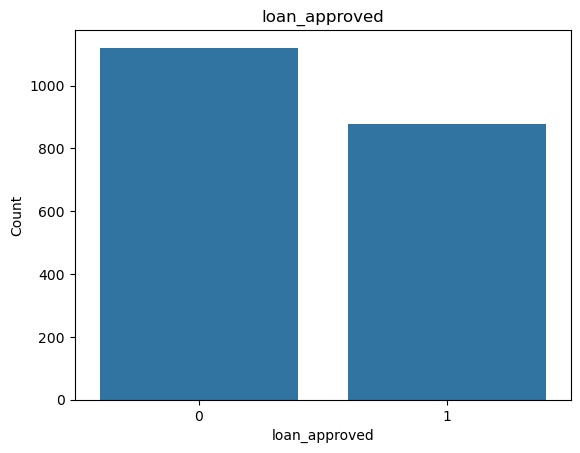

In [17]:
sns.countplot(x='loan_approved', data=df)
plt.title('loan_approved')
plt.xlabel('loan_approved')
plt.ylabel('Count')
plt.show()

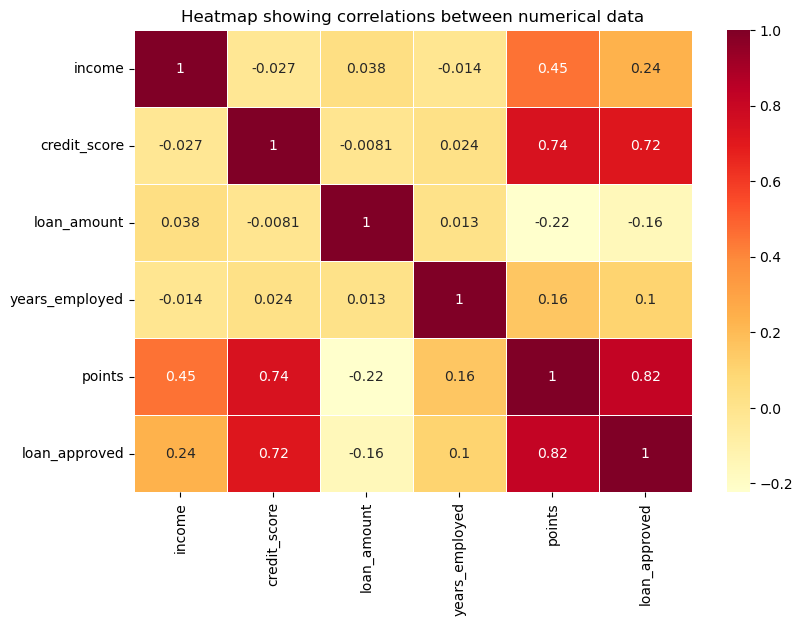

In [18]:
data_numeric = df.select_dtypes(include=['number']) 
plt.figure(figsize=(9, 6))
sns.heatmap(data_numeric.corr(), annot=True, linewidths=.5, cmap='YlOrRd')
plt.title('Heatmap showing correlations between numerical data')
plt.show()

array([[<Axes: title={'center': 'income'}>,
        <Axes: title={'center': 'credit_score'}>],
       [<Axes: title={'center': 'loan_amount'}>,
        <Axes: title={'center': 'years_employed'}>],
       [<Axes: title={'center': 'points'}>, <Axes: >]], dtype=object)

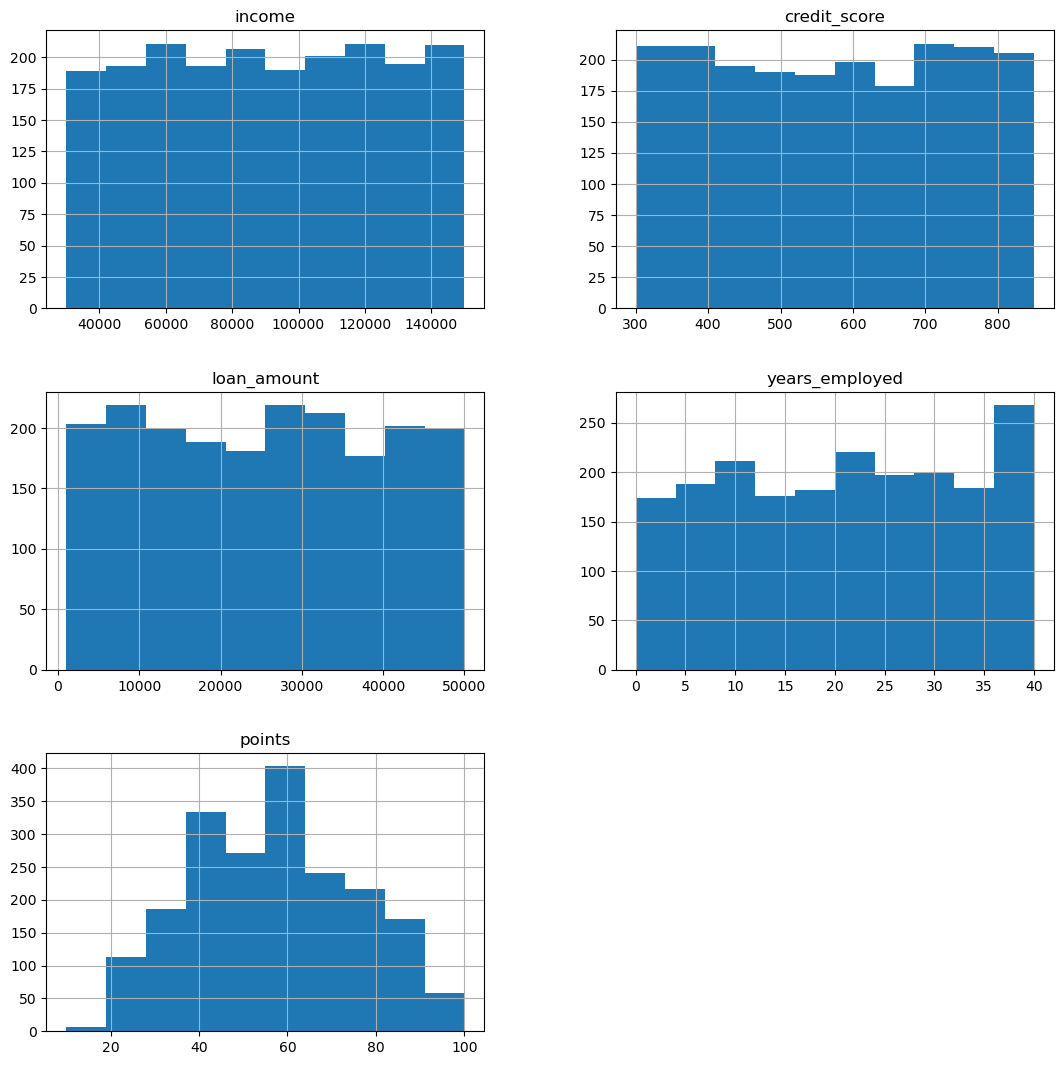

In [19]:
df[numerical].hist(figsize = (13, 13))

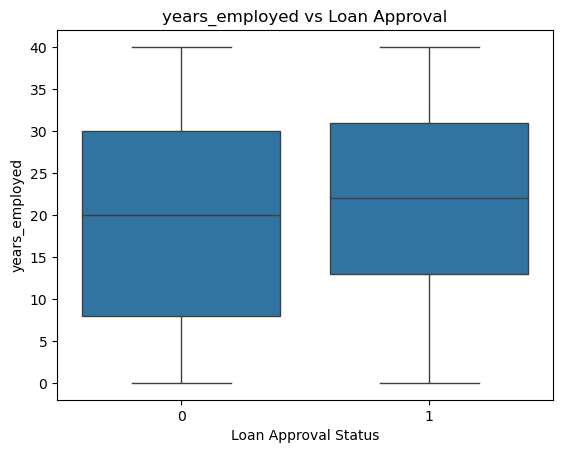

In [20]:
# VISUALIZE CONTINUOUS VARIABLE VS TARGET VARIABLE
sns.boxplot(x='loan_approved', y='years_employed', data=df)  
plt.title('years_employed vs Loan Approval')
plt.xlabel('Loan Approval Status')
plt.ylabel('years_employed')
plt.show()

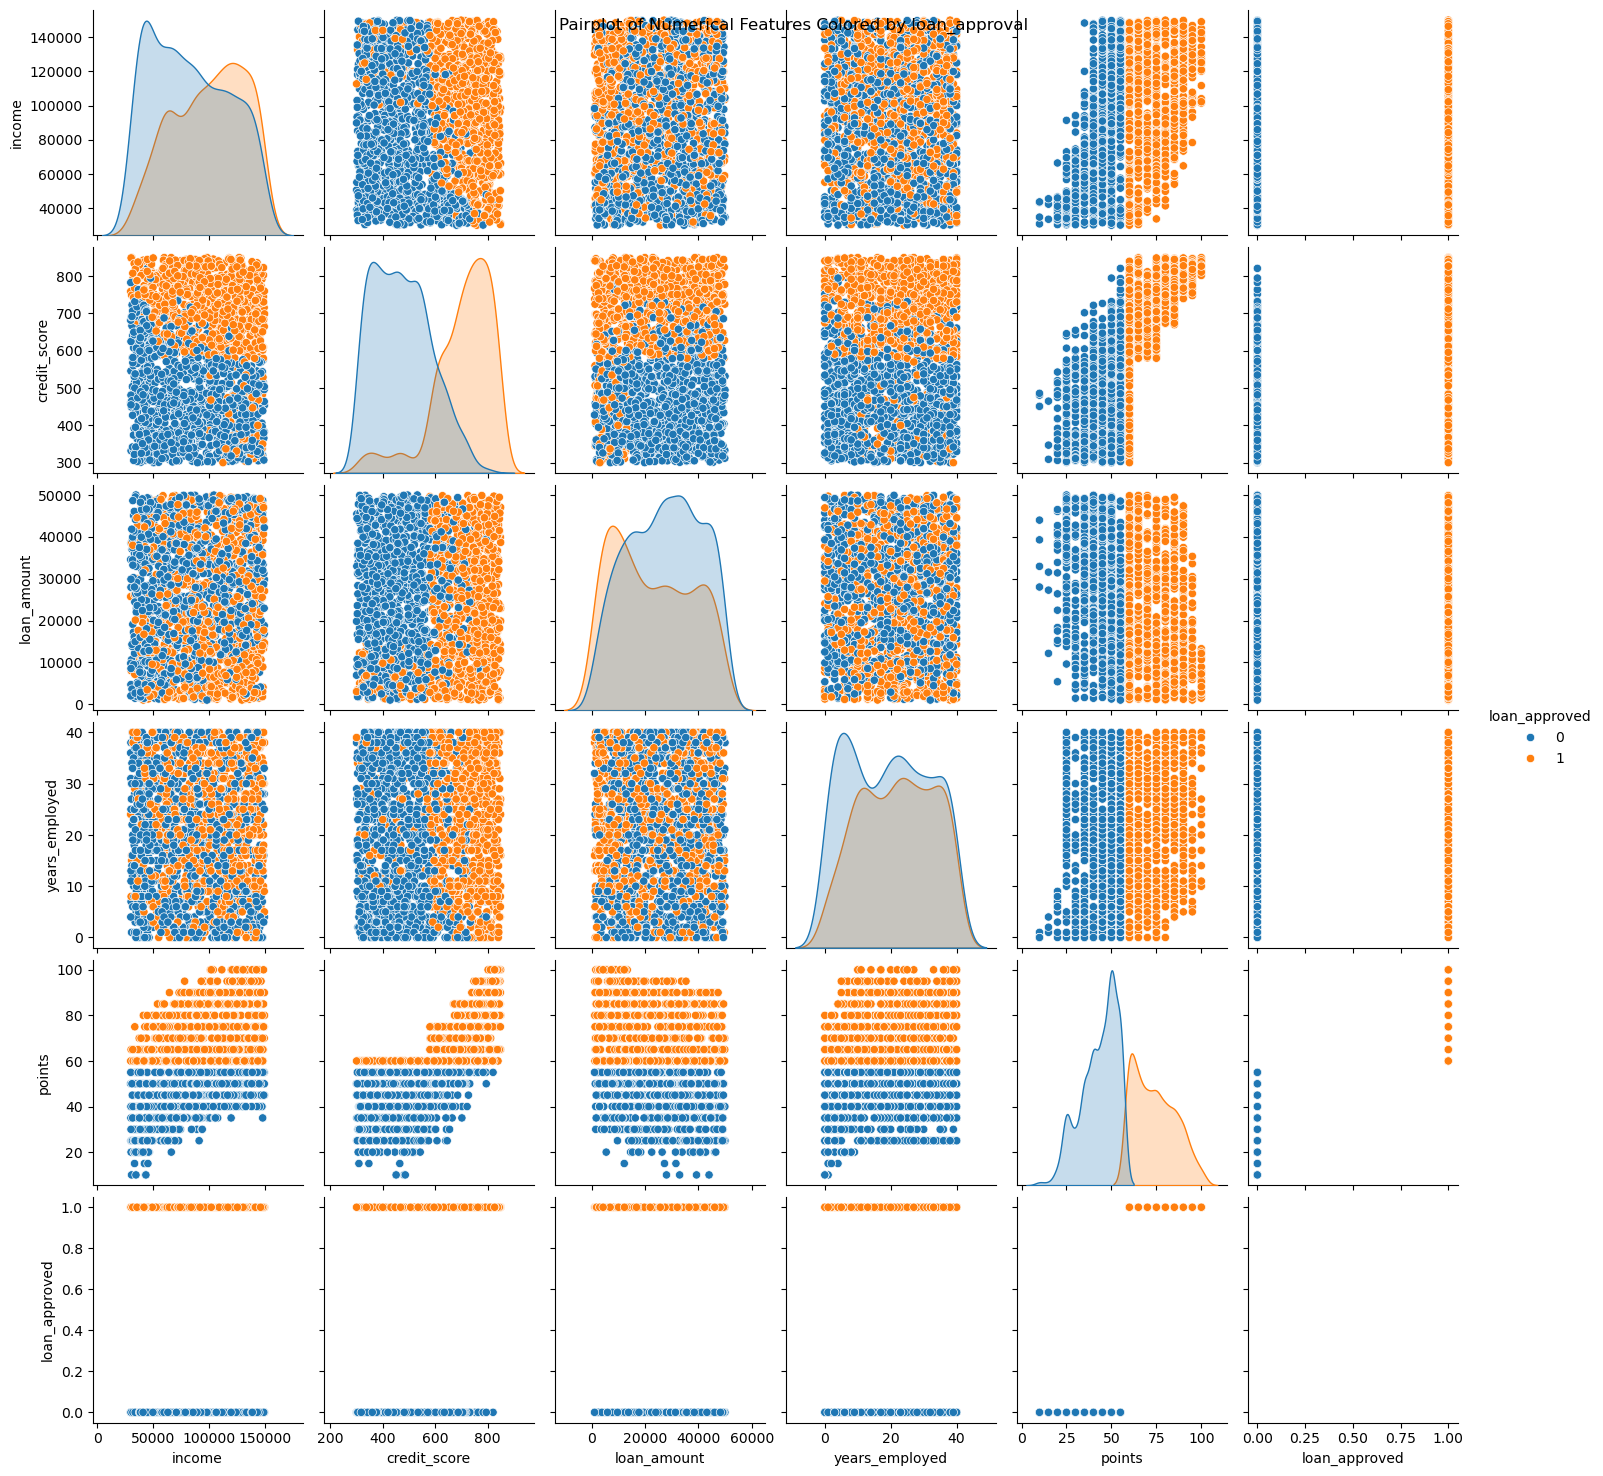

In [21]:
sns.pairplot(df, hue='loan_approved', vars=['income', 'credit_score', 'loan_amount', 'years_employed', 'points', 'loan_approved'])
plt.suptitle('Pairplot of Numerical Features Colored by loan_approval')
plt.show()

In [22]:
 #split the loan_approval dataset into train,val and test sets
df_full_train, df_test = train_test_split(df, test_size=0.2, random_state=42)
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

In [23]:
#check fo the length 
len(df_train), len(df_val), len(df_test)

(1200, 400, 400)

In [24]:
df['loan_approved'].value_counts()

loan_approved
0    1121
1     879
Name: count, dtype: int64

In [25]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

y_train = df_train.loan_approved.values
y_val = df_val.loan_approved.values
y_test = df_test.loan_approved.values

del df_train['loan_approved']
del df_val['loan_approved']
del df_test['loan_approved']

In [26]:
train_dicts = df_train.to_dict(orient = 'records')
dv= DictVectorizer(sparse = False) 
X_train = dv.fit_transform(train_dicts)

In [27]:
model = LogisticRegression(max_iter=1000, solver='lbfgs')
model

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [28]:
model.fit(X_train,y_train)

c:\Users\user\anaconda3\envs\ml-zoomcamp\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [29]:
val_dicts = df_val.to_dict(orient = 'records')
X_val = dv.transform(val_dicts)

In [30]:
test_dicts = df_test.to_dict(orient = 'records')
X_test = dv.transform(test_dicts)

In [31]:
model.coef_

array([[ 0.0175936 ,  0.00259231, -0.00769404, ..., -0.00769922,
         2.15034307,  0.01500721]], shape=(1, 2367))

In [32]:
model.coef_[0].round(3)

array([ 0.018,  0.003, -0.008, ..., -0.008,  2.15 ,  0.015], shape=(2367,))

In [33]:
model.intercept_

array([-126.91918002])

In [34]:
model.intercept_[0]

np.float64(-126.9191800155458)

In [35]:
model.fit(X_train,y_train)

c:\Users\user\anaconda3\envs\ml-zoomcamp\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [36]:
model.predict_proba(X_test).round(2)

array([[1.  , 0.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.01, 0.99],
       [0.99, 0.01],
       [0.  , 1.  ],
       [0.99, 0.01],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [0.  , 1.  ],
       [1.  , 0.  ],
       [1.  , 0.  ],
       [1.  ,

In [37]:
y_pred = model.predict(X_test)
y_pred

array([0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,

In [38]:
reg_params = [0.01, 0.1, 1, 2, 10, 100]
reg_params_scores = []
for param in reg_params:
    model = LogisticRegression(solver = 'liblinear', C = param,max_iter = 1000, random_state = 42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)    
    param_score = 100 * (y_pred == y_val).mean()

    reg_params_scores += [round(param_score, 3)]
param_scores = pd.Series(reg_params_scores, index = reg_params, name = "parameters_scores")
param_scores

0.01      84.0
0.10      84.5
1.00      84.5
2.00      84.5
10.00     84.5
100.00    84.5
Name: parameters_scores, dtype: float64

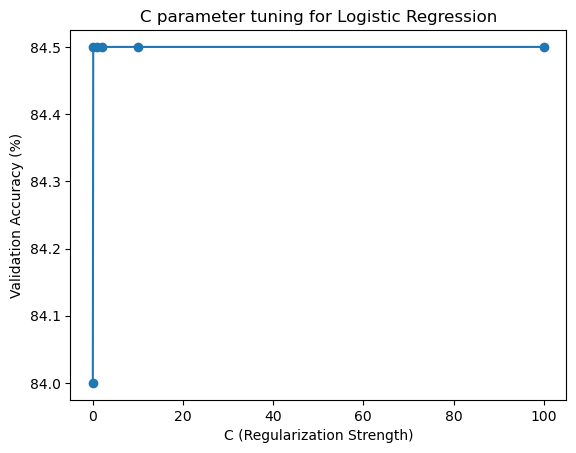

In [39]:
param_scores.plot(marker='o')
plt.xlabel("C (Regularization Strength)")
plt.ylabel("Validation Accuracy (%)")
plt.title("C parameter tuning for Logistic Regression")
plt.show()

In [40]:
X = df.drop('loan_approved', axis=1)  # features
y = df['loan_approved']               #target

In [41]:
print(X.shape)
print(y.value_counts())

(2000, 7)
loan_approved
0    1121
1     879
Name: count, dtype: int64


In [42]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [43]:
dt = DecisionTreeClassifier(max_depth=2)
dt.fit(X_train, y_train)
 
y_pred = dt.predict_proba(X_train)[:, 1]
auc = roc_auc_score(y_train, y_pred)
print('train', auc)

y_pred = dt.predict_proba(X_val)[:, 1]
auc = roc_auc_score(y_val, y_pred)
print('val', auc)

train 1.0
val 1.0


In [44]:
print(export_text(dt, feature_names=dv.get_feature_names_out()))

|--- points <= 57.50
|   |--- class: 0
|--- points >  57.50
|   |--- class: 1



In [45]:
depths = [1, 2, 3, 4, 5, 6, 10, 15, 20, None]
 
for depth in depths: 
    dt = DecisionTreeClassifier(max_depth=depth)
    dt.fit(X_train, y_train)
     
    # remember we need the column with negative scores
    y_pred = dt.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
     
    print('%4s -> %.3f' % (depth, auc))

   1 -> 1.000
   2 -> 1.000
   3 -> 1.000
   4 -> 1.000
   5 -> 1.000
   6 -> 1.000
  10 -> 1.000
  15 -> 1.000
  20 -> 1.000
None -> 1.000


In [46]:
scores = []
 
for d in [4, 5, 6]:
    for s in [1, 2, 5, 10, 15, 20, 100, 200, 500]:
        dt = DecisionTreeClassifier(max_depth=depth, min_samples_leaf=s)
        dt.fit(X_train, y_train)
 
        y_pred = dt.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)
         
        scores.append((d, s, auc))
 
columns = ['max_depth', 'min_samples_leaf', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.head()

,max_depth,min_samples_leaf,auc
0,4,1,1.0
1,4,2,1.0
2,4,5,1.0
3,4,10,1.0
4,4,15,1.0


In [47]:
df_scores.sort_values(by='auc', ascending=False).head()

,max_depth,min_samples_leaf,auc
0,4,1,1.0
14,5,20,1.0
25,6,200,1.0
24,6,100,1.0
23,6,20,1.0


<Axes: xlabel='None-max_depth', ylabel='min_samples_leaf'>

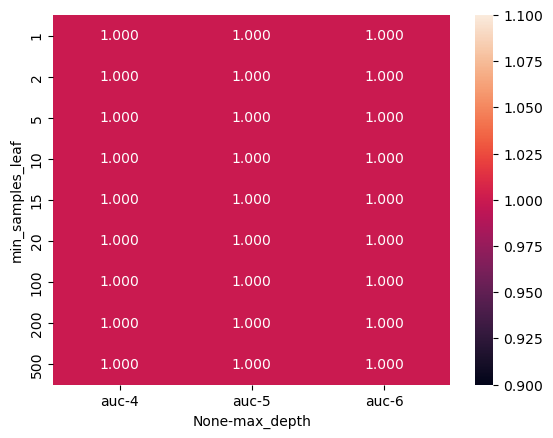

In [48]:
# index - rows
df_scores_pivot = df_scores.pivot(index='min_samples_leaf', columns=['max_depth'], values=['auc'])
df_scores_pivot.round(3)
sns.heatmap(df_scores_pivot, annot=True, fmt=".3f")

In [49]:
dt = DecisionTreeClassifier(max_depth=6, min_samples_leaf=15)
dt.fit(X_train, y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,6
,min_samples_split,2
,min_samples_leaf,15
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [50]:
rf = RandomForestClassifier(n_estimators=10)
rf.fit(X_train, y_train)
 
y_pred = rf.predict_proba(X_val)[:, 1]
roc_auc_score(y_val, y_pred)
 
rf.predict_proba(X_val[[0]])

array([[0.9, 0.1]])

In [51]:
scores = []
 
for n in range(10, 201, 10):
    rf = RandomForestClassifier(n_estimators=n, random_state=1)
    rf.fit(X_train, y_train)
 
    y_pred = rf.predict_proba(X_val)[:, 1]
    auc = roc_auc_score(y_val, y_pred)
     
    scores.append((n, auc))
 
df_scores = pd.DataFrame(scores, columns=['n_estimators', 'auc'])
df_scores

,n_estimators,auc
0,10,1.0
1,20,1.0
2,30,1.0
3,40,1.0
4,50,1.0
5,60,1.0
6,70,1.0
7,80,1.0
8,90,1.0
9,100,1.0


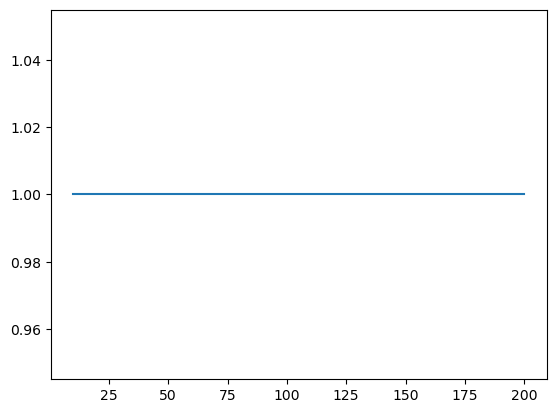

In [52]:
plt.plot(df_scores.n_estimators, df_scores.auc)

In [53]:
scores = []

for d in [5, 10, 15]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=d,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((d, n, auc))

In [54]:
columns = ['max_depth', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)
df_scores.groupby("max_depth")["auc"].mean().round(4)

max_depth
5     0.9982
10    0.9968
15    0.9968
Name: auc, dtype: float64

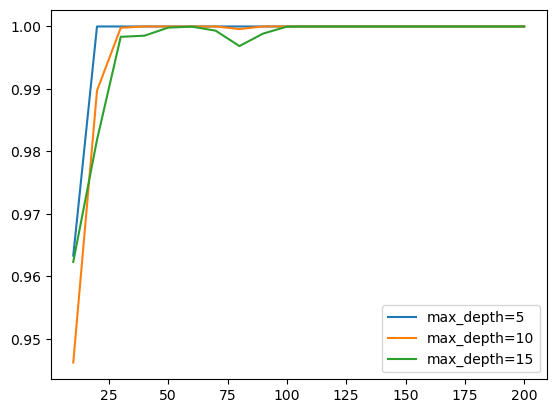

In [55]:
for d in [5, 10, 15]:
    df_subset = df_scores[df_scores.max_depth == d]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             label='max_depth=%d' % d)

plt.legend()

In [56]:
max_depth = 15

In [57]:
scores = []

for s in [1, 3, 5, 10, 50]:
    for n in range(10, 201, 10):
        rf = RandomForestClassifier(n_estimators=n,
                                    max_depth=max_depth,
                                    min_samples_leaf=s,
                                    random_state=1)
        rf.fit(X_train, y_train)

        y_pred = rf.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_pred)

        scores.append((s, n, auc))

In [58]:
columns = ['min_samples_leaf', 'n_estimators', 'auc']
df_scores = pd.DataFrame(scores, columns=columns)

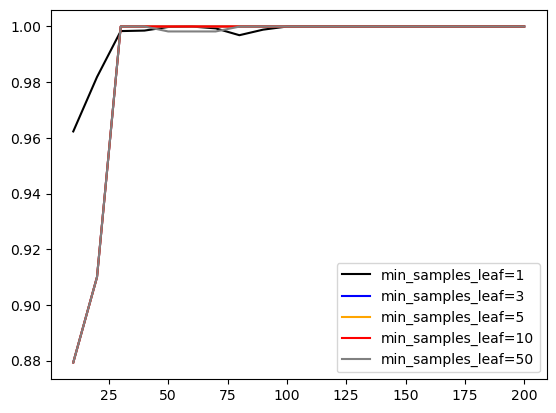

In [59]:
colors = ['black', 'blue', 'orange', 'red', 'grey']
values = [1, 3, 5, 10, 50]

for s, col in zip(values, colors):
    df_subset = df_scores[df_scores.min_samples_leaf == s]
    
    plt.plot(df_subset.n_estimators, df_subset.auc,
             color=col,
             label='min_samples_leaf=%d' % s)

plt.legend()

In [60]:
min_samples_leaf = 1

In [61]:
f = RandomForestClassifier(n_estimators=200,
                            max_depth=max_depth,
                            min_samples_leaf= min_samples_leaf,
                            random_state=42)
rf.fit(X_train, y_train)

,n_estimators,200
,criterion,'gini'
,max_depth,15
,min_samples_split,2
,min_samples_leaf,50
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [62]:
import xgboost as xgb
print(xgb.__version__)
dtrain = xgb.DMatrix(X_train, label=y_train)
dval = xgb.DMatrix(X_val, label=y_val)

watchlist = [(dtrain, "train"), (dval, "eval")]

3.1.1


In [63]:
xgb_params = {
    'eta' :0.3,
    'max_depth' :6,
    'min_child_weight' :1,
    'objective' : 'binary:logistic',
    'nthread' :8,

    'seed' :1,
    'verbosity' :1,
}

model = xgb.train(xgb_params,dtrain, num_boost_round=10)

In [64]:
y_pred = model.predict(dval)
roc_auc_score(y_val, y_pred)

1.0

In [65]:
watchlist = [(dtrain, 'train'), (dval, 'val')]

In [66]:
xgb_params = {
    'eta' :0.3,
    'max_depth' :6,
    'min_child_weight' :1,
    'objective' : 'binary:logistic',
    'nthread' :8,
    'seed' :1,
    'verbosity' :1,
}

model = xgb.train(xgb_params, dtrain, num_boost_round=200, evals=watchlist)

[0]	train-logloss:0.43289	val-logloss:0.42881
[1]	train-logloss:0.29379	val-logloss:0.29132
[2]	train-logloss:0.20615	val-logloss:0.20452
[3]	train-logloss:0.14747	val-logloss:0.14635
[4]	train-logloss:0.10683	val-logloss:0.10604
[5]	train-logloss:0.07808	val-logloss:0.07752
[6]	train-logloss:0.05747	val-logloss:0.05706
[7]	train-logloss:0.04255	val-logloss:0.04225
[8]	train-logloss:0.03168	val-logloss:0.03145
[9]	train-logloss:0.02372	val-logloss:0.02355
[10]	train-logloss:0.01786	val-logloss:0.01774
[11]	train-logloss:0.01355	val-logloss:0.01345
[12]	train-logloss:0.01036	val-logloss:0.01028
[13]	train-logloss:0.00799	val-logloss:0.00793
[14]	train-logloss:0.00623	val-logloss:0.00619
[15]	train-logloss:0.00492	val-logloss:0.00488
[16]	train-logloss:0.00393	val-logloss:0.00390
[17]	train-logloss:0.00318	val-logloss:0.00316
[18]	train-logloss:0.00261	val-logloss:0.00259
[19]	train-logloss:0.00218	val-logloss:0.00216
[20]	train-logloss:0.00184	val-logloss:0.00182
[21]	train-logloss:0.00

In [67]:
y_pred = model.predict(dval)
roc_auc_score(y_val, y_pred)

1.0

In [68]:
import pickle

In [69]:
output_file = 'Random_Forest_Model.bin'
output_file

'Random_Forest_Model.bin'

In [70]:
f_out = open(output_file, 'wb')
 
pickle.dump((dv, rf), f_out)
 
f_out.close()

In [71]:
with open(output_file, 'wb') as f_out:
    pickle.dump((dv, rf), f_out)

In [72]:
input_file = 'Random_Forest_Model.bin'


with open(input_file,'rb') as f_in:
    
    dv, rf = pickle.load(f_in)

rf

,n_estimators,200
,criterion,'gini'
,max_depth,15
,min_samples_split,2
,min_samples_leaf,50
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [73]:
import pandas as pd

# client dictionary
client = {'name':'Allison Hill',
          'city':'Mariastad',
          'income':33278,
          'credit_score':584, 
          'loan_amount':15446,
          'years_employed':13,
          'points':45.0,
          'loan_approved': False
         }

# Convert to DataFrame
client_df = pd.DataFrame([client])

# Transform features using the loaded encoder
X_client = dv.transform(client_df.to_dict(orient='records'))

# Make prediction
pred_class = rf.predict(X_client)[0]
pred_prob = rf.predict_proba(X_client)[0, 1]  # probability of positive class

# Display input and results
print("client information:")
display(client_df)

print(f"Predicted class: {pred_class}")
print(f"Predicted probability of loan_approved: {pred_prob:.2f}")

# Define approval if necessary
if pred_class == 1:
    print("Loan_approval should be considered for this client.")


client information:


,name,city,income,credit_score,loan_amount,years_employed,points,loan_approved
0,Allison Hill,Mariastad,33278,584,15446,13,45.0,False


Predicted class: 0
Predicted probability of loan_approved: 0.43
